# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


### Necessary Library Requirements:

#### Same as Lab1 except PAMI:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 install scikit-learn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 install maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install via `pip3 install seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install via `pip3 install umap-learn` from a terminal
    

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

- [Ollama](https://ollama.com)
    - Install via `pip3 install ollama`

- [langchain](https://www.langchain.com)
    - Install via `pip3 install langchain`
    - Also install `pip3 install langchain_community`
    - Also install `pip3 install langchain_core`
    
- [beautifulsoup4](https://pypi.org/project/beautifulsoup4/)
    - Install via `pip3 install beautifulsoup4`
    
- [chromadb](https://www.trychroma.com)
    - Install via `pip3 install chromadb`
    
- [gradio](https://www.gradio.app)
    - Install via `pip3 install gradio`
    
#### Open-source LLMs to install:
- ollama run llama3.2
- ollama run llama3.2:1b  (optional if the first one is too big)
- ollama run llava-phi3

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## Setup (IGNORE)

In [1]:
!pip3 install scikit-learn --upgrade
!pip3 install pandas --upgrade
!pip3 install numpy --upgrade
!pip3 install matplotlib --upgrade
!pip3 install plotly --upgrade
!pip3 install seaborn --upgrade
!pip3 install nltk --upgrade
!pip3 install umap-learn --upgrade
!pip3 install gensim --upgrade
#!pip3 install tensorflow --upgrade
!pip3 install tensorflow==2.17.0
#!pip3 install keras --upgrade
!pip3 install keras==3.6.0
!pip3 install ollama --upgrade
!pip3 install langchain --upgrade
!pip3 install langchain_community --upgrade
!pip3 install langchain_core --upgrade
!pip3 install beautifulsoup4 --upgrade
!pip3 install chromadb --upgrade
!pip3 install gradio --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 52.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 51.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's

In [2]:
#Download ollama
!curl -fsSL https://ollama.com/install.sh | sh
import subprocess
process = subprocess.Popen("ollama serve", shell=True) #runs on a different thread

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [3]:
#Download model llama 3.2:1b
!ollama pull llama3.2:1b

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest 
pulling 74701a8c35f6...   0% ▕▏    0 B/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   0% ▕▏    0 B/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   1% ▕▏  12 MB/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   2% ▕▏  19 MB/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   4% ▕▏  48 MB/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   4% ▕▏  59 MB/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   6% ▕▏  75 MB/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   6% ▕▏  81 MB/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   7% ▕▏  96 MB/1.3 GB                  pulli

In [4]:
#Download model llama 3.2
!ollama pull llama3.2

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏ 5.7 MB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   1% ▕▏  25 MB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   2% ▕▏  32 MB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   2% ▕▏  48 MB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   3% ▕▏  67 MB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   4% ▕▏  72 MB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...  

In [5]:
#Download model llava-phi3
!ollama pull llava-phi3

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest 
pulling 377876be20ba...   0% ▕▏    0 B/2.3 GB                  pulling manifest 
pulling 377876be20ba...   0% ▕▏ 3.2 MB/2.3 GB                  pulling manifest 
pulling 377876be20ba...   1% ▕▏  20 MB/2.3 GB                  pulling manifest 
pulling 377876be20ba...   2% ▕▏  43 MB/2.3 GB                  pulling manifest 
pulling 377876be20ba...   3% ▕▏  59 MB/2.3 GB                  pulling manifest 
pulling 377876be20ba...   4% ▕▏  90 MB/2.3 GB                  pulling manifest 
pulling 377876be20ba...   5% ▕▏ 116 MB/2.3 GB                  pulling manifest 
pulling 377876be20ba...   6% ▕▏ 131 MB/2.3 GB                  pulling manifest 
pulling 377876be20ba...   6% ▕▏ 143 MB/2.3 GB                  pulli

In [6]:
# import library
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import umap
import gensim
import tensorflow
import keras
import ollama
import langchain
import langchain_community
import langchain_core
import bs4
import chromadb
import gradio
%matplotlib inline
print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

gensim: 4.3.3
tensorflow: 2.17.0
keras: 3.6.0


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
## Introduction

---
## 1. Data Preparation

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [ ]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [9]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [ ]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [11]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [12]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [13]:
!pip install nltk

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

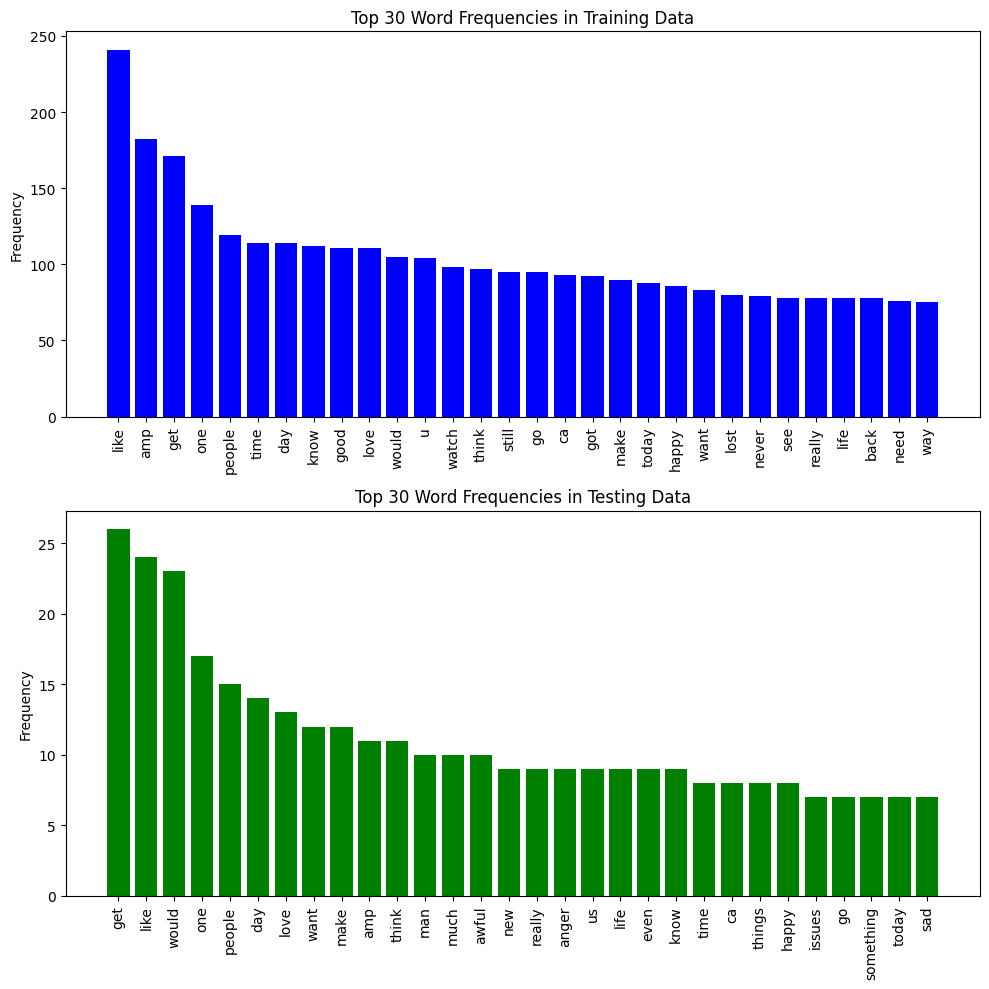

In [15]:
# Answer here

# Combining all text data from training and testing datasets
all_text_train = ' '.join(train_df['text'].tolist())
all_text_test = ' '.join(test_df['text'].tolist())

# Tokenization
words_train = word_tokenize(all_text_train)
words_test = word_tokenize(all_text_test)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words_train = [word.lower() for word in words_train if word.isalpha() and word.lower() not in stop_words]
filtered_words_test = [word.lower() for word in words_test if word.isalpha() and word.lower() not in stop_words]

# Frequency distribution
freq_dist_train = nltk.FreqDist(filtered_words_train)
freq_dist_test = nltk.FreqDist(filtered_words_test)

# Top 30 words
top_words_train = freq_dist_train.most_common(30)
top_words_test = freq_dist_test.most_common(30)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot for training data
axs[0].bar([word[0] for word in top_words_train], [freq[1] for freq in top_words_train], color='blue')
axs[0].set_title('Top 30 Word Frequencies in Training Data')
axs[0].set_ylabel('Frequency')
axs[0].tick_params(axis='x', rotation=90)

# Plot for testing data
axs[1].bar([word[0] for word in top_words_test], [freq[1] for freq in top_words_test], color='green')
axs[1].set_title('Top 30 Word Frequencies in Testing Data')
axs[1].set_ylabel('Frequency')
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [16]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [17]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [18]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

,text
emotion,
anger,857
fear,1147
joy,823
sadness,786


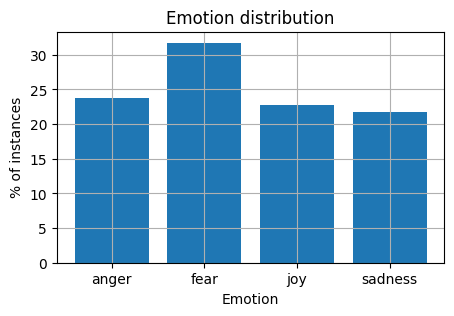

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [22]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [23]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [24]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [25]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [27]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [28]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [29]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [30]:
train_data_BOW_features_500.toarray()

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0]])

In [31]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [32]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [33]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
# Initialize the TF-IDF Vectorizer with a maximum of 1000 features
tfidf_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# Learn a vocabulary dictionary of all tokens in the raw documents and transform documents to matrix
tfidf_vectorizer.fit(train_df['text'])
train_data_tfidf_features = tfidf_vectorizer.transform(train_df['text'])
test_data_tfidf_features = tfidf_vectorizer.transform(test_df['text'])


In [35]:
# Checking the shape of the output arrays
print("Shape of Train TF-IDF Features:", train_data_tfidf_features.shape)
print("Shape of Test TF-IDF Features:", test_data_tfidf_features.shape)

Shape of Train TF-IDF Features: (3613, 1000)
Shape of Test TF-IDF Features: (347, 1000)


In [36]:
# Observe some feature names within the specified range
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
print(feature_names_tfidf[100:110])

['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']


---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [38]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'fear', 'fear', 'anger', 'sadness', 'joy', 'fear', 'fear',
       'fear', 'sadness'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [39]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [40]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [41]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [42]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

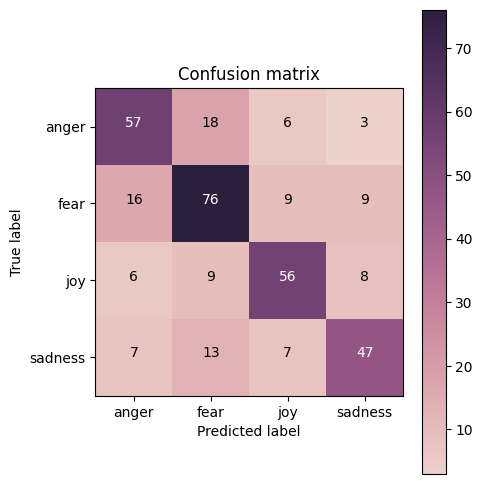

In [43]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [44]:
# Answer here
# - The diagonal elements represent the number of correct predictions for each emotion
# (True Positives for each class).
# - Off-diagonal elements show the number of misclassifications/

# The model performs best when predicting fear.
# Anger is often confused with fear, same with fear confused as anger,
# there might be some overlap with how the features represent the emotions in the dataset.
# Sadness is also mistaked as fear.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [45]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
# Initialize the Multinomial Naive Bayes model
NB_model = MultinomialNB()

# Train the model
NB_model.fit(X_train, y_train)

MultinomialNB()

In [47]:
# Predict on training data and testing data
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

# Evaluate the model
print("Training Accuracy:", NB_model.score(X_train, y_train))
print("Testing Accuracy:", NB_model.score(X_test, y_test))

report = classification_report(y_test, y_test_pred, target_names=['anger', 'fear', 'joy', 'sadness'])
print("Classification Report:\n", report)

Training Accuracy: 0.7918627179629117
Testing Accuracy: 0.6974063400576369
Classification Report:
               precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [48]:
# Generate confusion matrix for test data
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


In [49]:
# Function for visualizing confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Labeling the plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

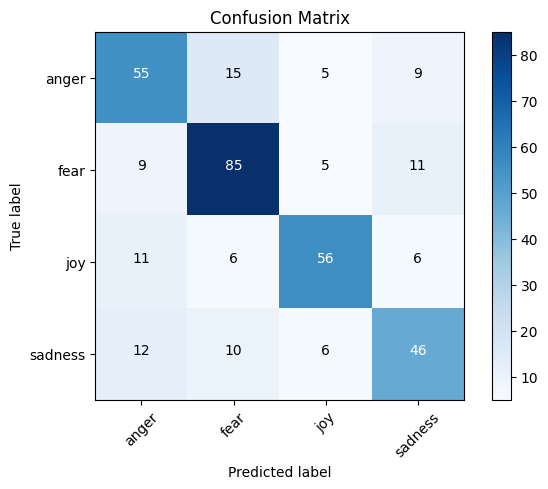

In [50]:
# Plot confusion matrix
plot_confusion_matrix(cm, classes=['anger', 'fear', 'joy', 'sadness'])

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [51]:
# Answer here

# Naive Bayes performs better for anger and fear.
# But for joy and sadness, the perfomance is quite similar

# Naive Bayes has fewer instances where anger is misclassified as fear, compared to the Decision Tree.
# For joy, the Naive Bayes model has fewer misclassifications as fear than the Decision Tree.

# Naive bayes assumes all features (words) are independent given the class label,
# this simplification can lead to better performance.

# Decision tree does not assume independece and can model interactions between different features,
# which could result in fitting to noise in the training data.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](attachment:pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [52]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [53]:
import keras

In [54]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [55]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2974    sadness
656       anger
416       anger
84        anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [56]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](attachment:pic2.png)

In [57]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.3312 - loss: 1.3554 - val_accuracy: 0.4265 - val_loss: 1.2756
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5974 - loss: 1.0949 - val_accuracy: 0.6427 - val_loss: 0.9459
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7905 - loss: 0.6255 - val_accuracy: 0.6888 - val_loss: 0.7822
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8452 - loss: 0.4221 - val_accuracy: 0.6916 - val_loss: 0.7835
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8898 - loss: 0.3155 - val_accuracy: 0.6715 - val_loss: 0.8367
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9165 - loss: 0.2620 - val_accuracy: 0.6801 - val_loss: 0.8728
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9302 - loss: 0.2105 - val_accuracy: 0.6513 - val_loss: 0.8977
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9528 - loss: 0.1738 - val_accuracy: 0.6715 - val

### 6.5 Predict on testing data

In [59]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[3.2967985e-06, 5.9857783e-08, 9.9999601e-01, 5.4288938e-07],
       [5.3354279e-06, 9.9997562e-01, 2.9632533e-06, 1.5929285e-05],
       [7.2492090e-05, 9.9992639e-01, 3.4459410e-07, 6.5779261e-07],
       [9.9999982e-01, 1.3440786e-07, 2.3463982e-09, 1.8853192e-09],
       [9.5381297e-04, 1.9238548e-02, 1.1448789e-05, 9.7979617e-01]],
      dtype=float32)

In [60]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'fear', 'fear', 'anger', 'sadness'], dtype=object)

In [61]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.368945,1.322320,0.426513,1.275599
1,1,0.634653,0.995785,0.642651,0.945911
2,2,0.783559,0.603998,0.688761,0.782211
3,3,0.842790,0.419781,0.691643,0.783466
4,4,0.882092,0.326786,0.671470,0.836721
5,5,0.905895,0.273963,0.680115,0.872770
6,6,0.923886,0.224340,0.651297,0.897651
7,7,0.944368,0.185652,0.671470,0.969835
8,8,0.952948,0.162595,0.662824,1.017696
9,9,0.960421,0.140903,0.651297,1.079137


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](attachment:pic3.png)


![pic4.png](attachment:pic4.png)

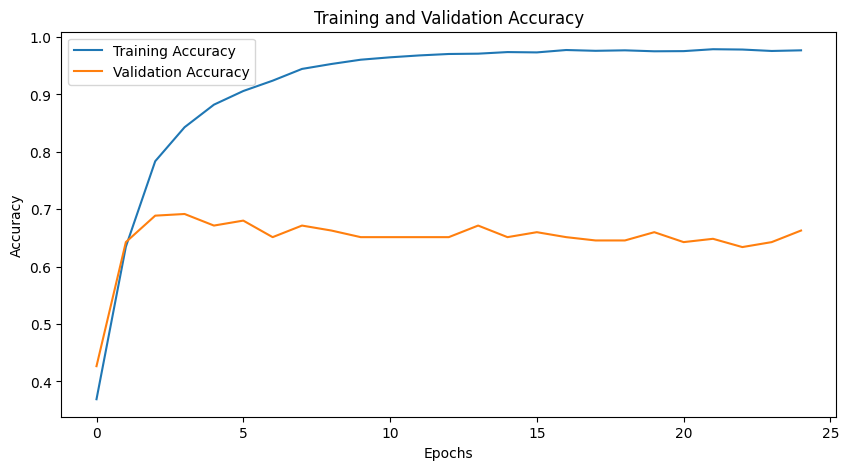

In [63]:
# Answer here
# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


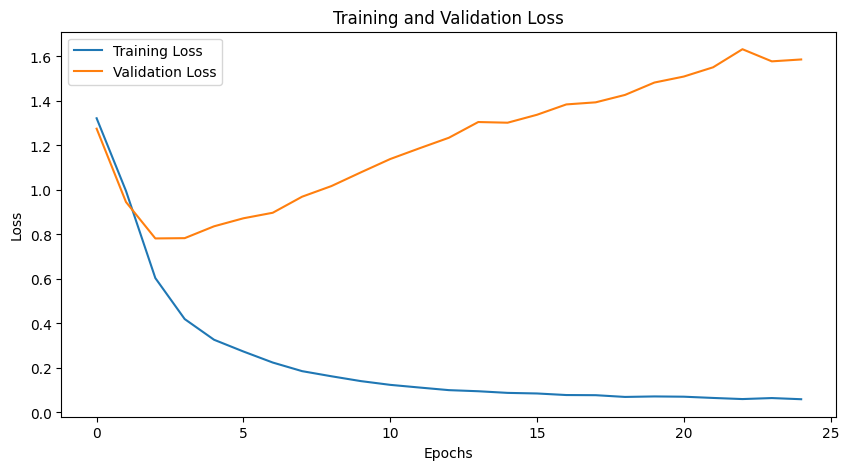

In [64]:
# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(training_log['epoch'], training_log['loss'], label='Training Loss')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**How to intepret?**

The training accuracy gradually increase towards 1 (100%), and the training loss gradually decrease towards 0 as the model learns from the training data.

These plots show how well the model generalizes to unseen data. The validation accuracy should ideally increase similarly to the training accuracy, and the validation loss should decrease.

**Relationships and Concepts of Overfitting/Underfitting**

Overfitting occurs when training accuracy continues to improve nearly to perfect levels, but validation accuracy stagnate or decrease as training progesses.

Undefitting occurs when both training and validation accuracy remain low or loss remains high.

In the case of the plot above, the model most likely overfits, since the training accuracy is almost pefect, but validation stagnates at around less than 0.7


---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [65]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2974,40147,@knology has providing customers w/equipment t...,"[@, knology, has, providing, customers, w/equi..."
656,10656,#burning the last of @Yan,"[#, burning, the, last, of, @, Yan]"
416,10416,@ashleighjessica @zacflint1 I'd give that pout...,"[@, ashleighjessica, @, zacflint1, I, 'd, give..."
84,10084,but that was a mistake and a half assed excuse...,"[but, that, was, a, mistake, and, a, half, ass..."
3015,40188,All the 'juniors' are now wearing purple at ol...,"[All, the, 'juniors, ', are, now, wearing, pur..."


In [66]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'knology', 'has', 'providing', 'customers', 'w/equipment', 'that', 'does', "n't", 'deliver', 'speeds', 'of', 'internet', 'services', 'that', 'they', 'have', 'been', 'charging', '.', '#', 'unhappy', '#', 'scam']),
       list(['#', 'burning', 'the', 'last', 'of', '@', 'Yan']),
       list(['@', 'ashleighjessica', '@', 'zacflint1', 'I', "'d", 'give', 'that', 'pout', 'the', 'firm', 'D'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [67]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [68]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 6.90290928e-01,  2.68501719e-03, -2.60245025e-01,  4.72013205e-02,
       -8.41109455e-02, -6.43232882e-01,  7.66798615e-01,  1.34038270e+00,
       -4.02736634e-01, -1.02021508e-01, -8.47807229e-01, -5.11939168e-01,
       -4.20133889e-01,  1.52408659e-01, -2.47335821e-01, -4.08861101e-01,
        2.91766137e-01, -3.89503509e-01,  4.26432878e-01, -7.00782239e-01,
        5.67957282e-01,  6.16187871e-01,  8.18397164e-01, -4.29082990e-01,
        2.59203285e-01,  2.40580633e-01, -4.39343125e-01,  4.55234647e-01,
       -8.68977070e-01,  2.53955126e-01,  5.18584609e-01, -1.48546353e-01,
        8.22039366e-01, -5.85992336e-01,  3.52176875e-01,  7.37153232e-01,
        1.10997431e-01, -1.65324062e-01, -7.71819472e-01, -8.33924860e-02,
        5.32407165e-02, -3.78351331e-01, -2.04867288e-01, -6.45540208e-02,
        8.19747746e-01, -3.96171212e-01, -6.85018659e-01,  3.24106127e-01,
        3.89367640e-01,  3.74011695e-01, -1.10339515e-01, -8.76085699e-01,
       -3.37940186e-01,  

In [69]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9363886713981628),
 ('blessed', 0.9305500984191895),
 ('birthday', 0.9240732789039612),
 ('bday', 0.9207226634025574),
 ('🕋', 0.9166960120201111),
 ('nuclear', 0.9064731597900391),
 ('help', 0.9055042266845703),
 ('ampalaya', 0.9044888019561768),
 ('muslims', 0.9043034315109253),
 ('Makes', 0.9034862518310547)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [71]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [72]:
w2v_google_model.most_similar(positive=['animals', 'woman'], negative=['man'])

[('animal', 0.6774914264678955),
 ('pets', 0.665960431098938),
 ('cats', 0.6453738212585449),
 ('Animals', 0.60256427526474),
 ('felines', 0.5924459099769592),
 ('puppies', 0.5918370485305786),
 ('dogs', 0.590532124042511),
 ('exotic_felines', 0.5741807222366333),
 ('wolfdogs', 0.5711701512336731),
 ('equines', 0.5705947279930115)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [73]:
# Answer here
# We need to transform each sentence into a fixed size vector so that the model can process it.
# We can try different approaches:
# - Averaging the word vector for all the words in a sentence.
# - Sum the vectors (could retain more information per word compared to averaging)
# - Weighted Averaging by the TFIDF score to give more importance on certain words.
# - Concatenating the word vectors (max-pooling/mean-pooling) across vectors.

# After that, we can feed these vectors into a neural network to perform tasks like
# classification, etc.

## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [74]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [75]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7c46ee17c820>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](attachment:pic6.png)

In [76]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [77]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](attachment:pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:
![pic9-2.png](attachment:pic9-2.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [78]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

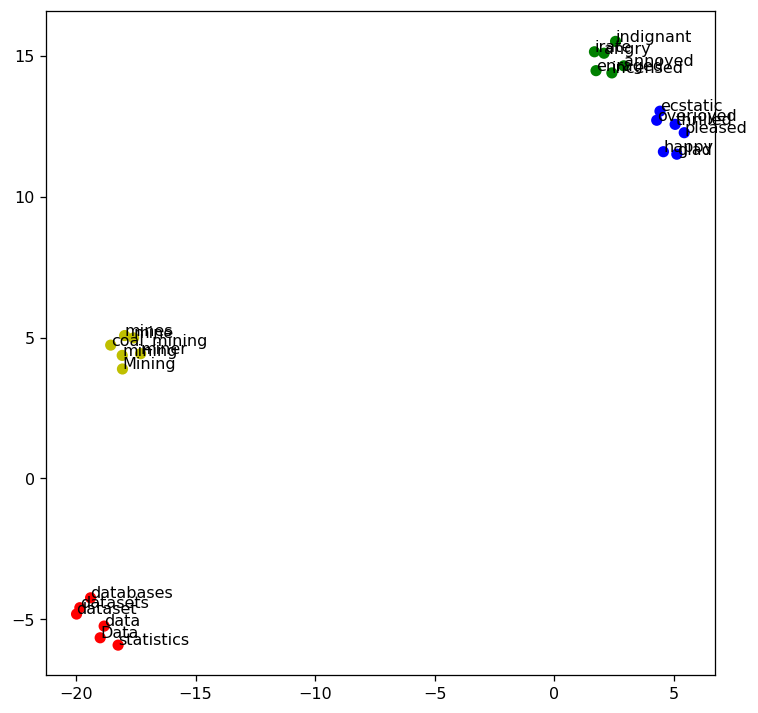

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

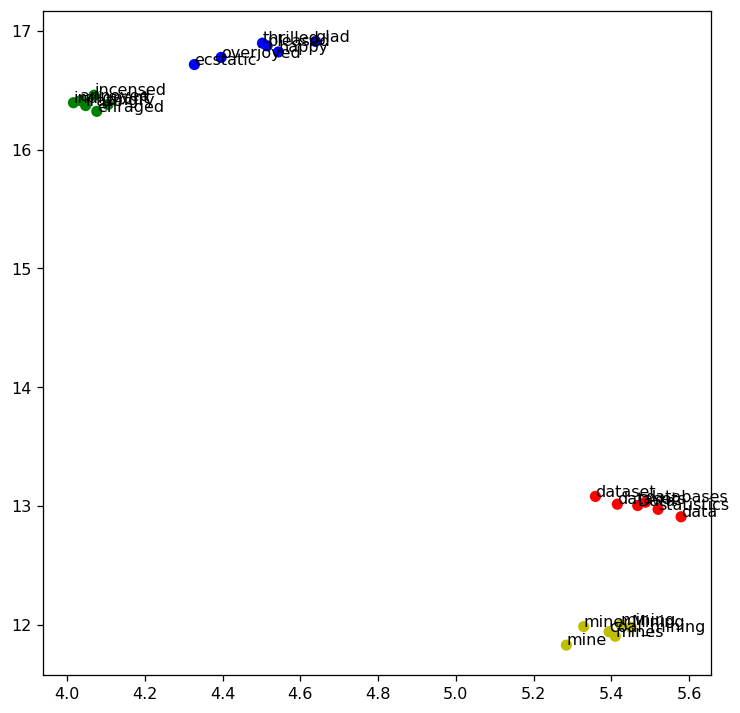

In [80]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [81]:
# Answer here
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap
import numpy as np

word_list = ['happy', 'angry', 'data', 'mining']
topn = 15

related_words = {}
for word in word_list:
    related_words[word] = [word] + [item[0] for item in w2v_google_model.most_similar(word, topn=topn)]
    print(related_words[word])
all_related_words = [word for sublist in related_words.values() for word in sublist] # flatten
X = np.array([w2v_google_model[word] for word in all_related_words]) # word vectors matrix

['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']


In [82]:
colors = ['red', 'green', 'blue', 'purple']
emotion_colors = np.concatenate([[colors[i]]*16 for i in range(4)])

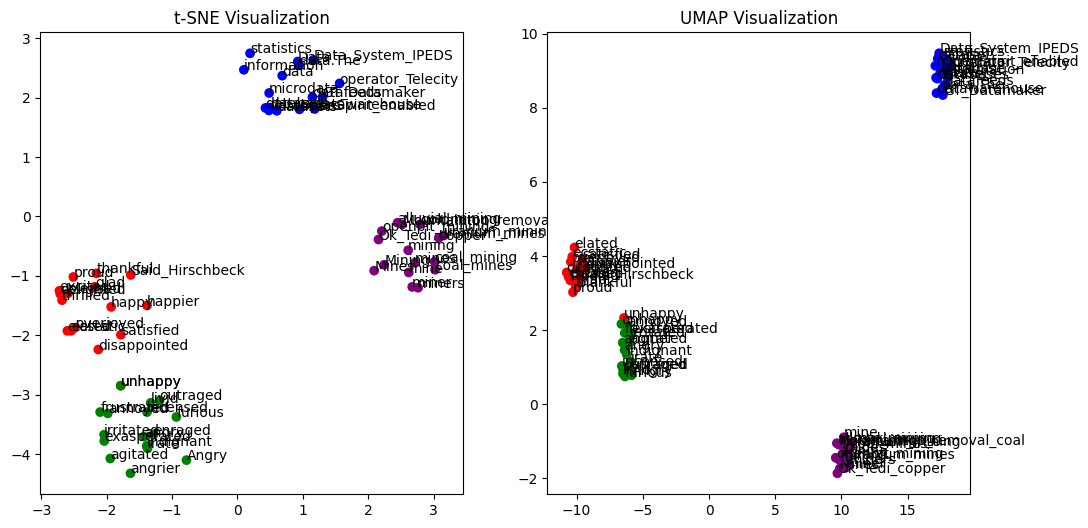

In [83]:
# t-SNE visualization
tsne = TSNE(n_components=2, metric='cosine', random_state=42)
X_tsne = tsne.fit_transform(X)

# UMAP visualization
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=42)
X_umap = umap_model.fit_transform(X)

# Plotting t-SNE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=emotion_colors)
plt.title('t-SNE Visualization')
for i, word in enumerate(all_related_words):
    plt.annotate(word, (X_tsne[i, 0], X_tsne[i, 1]))

# Plotting UMAP
plt.subplot(1, 2, 2)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=emotion_colors)
plt.title('UMAP Visualization')
for i, word in enumerate(all_related_words):
    plt.annotate(word, (X_umap[i, 0], X_umap[i, 1]))

plt.show()

**Compare the differences between both graphs**

- t-SNE assigns 'happy' and 'angry' data points as negatives on the y-axis while UMAP assigns them positive y-value
General Dispersion
- UMAP exhibits a much larger dispersion between one category and the next, as we can see on the axes (x-axis is double the scale of t-SNE while y-axis is 5 times the scale). This might result UMAP better distinguishing between different groups/categories.
- Both t-SNE and UMAP reduce dimensions but with trade-offs. t-SNE might compress clusters and and UMAP may spred out data points too much.
- 'unhappy' is categorized in 'happy' (t-SNE) and 'angry' (UMAP). t-SNE tends to focus on local relationships, so that words often used in similar contexts (even negations) might end up close to each other, 'unhappy' is contextually related to 'happy'. UMAP places more emphasis o global data structure, so 'unhappy' might be more aligned with 'angry' or other negative states (higher level categorization).


## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs:
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:
![pic10.png](attachment:pic10.png)

In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models:
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [ ]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

**Data Mining**

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various statistical and mathematical techniques to extract valuable knowledge or information from a large dataset.

### Types of Data Mining

*   **Supervised Learning**: In this type of data mining, the algorithm learns to make predictions based on labeled data.
*   **Unsupervised Learning**: In this type of data mining, the algorithm discovers patterns and relationships in unlabeled data.
*   **Reinforcement Learning**: In this type of data mining, the algorithm learns through trial and error by interacting with an environment.

### Data Mining Techniques

*   **Clustering**: Grouping similar data points into clusters based on their characteristics.
*   **Classification**: Assigning labels to data points based on their characteristics.
*   **Regression**: Predicting a continuous value based on one or more input variables.
*   **Decision

**We can use the IPython library to make the response look better:**

In [ ]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [ ]:
display(Markdown(response['message']['content']))

**Data Mining**
================

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various statistical and mathematical techniques to extract valuable knowledge or information from a large dataset.

### Types of Data Mining

*   **Supervised Learning**: In this type of data mining, the algorithm learns to make predictions based on labeled data.
*   **Unsupervised Learning**: In this type of data mining, the algorithm discovers patterns and relationships in unlabeled data.
*   **Reinforcement Learning**: In this type of data mining, the algorithm learns through trial and error by interacting with an environment.

### Data Mining Techniques

*   **Clustering**: Grouping similar data points into clusters based on their characteristics.
*   **Classification**: Assigning labels to data points based on their characteristics.
*   **Regression**: Predicting a continuous value based on one or more input variables.
*   **Decision Trees**: Creating a tree-like model of decisions and their consequences.

### Data Mining Applications

*   **Marketing**: Analyzing customer behavior and preferences to improve marketing strategies.
*   **Finance**: Identifying patterns in stock prices and predicting future trends.
*   **Healthcare**: Analyzing patient data to identify potential health risks and develop personalized treatment plans.
*   **Customer Relationship Management (CRM)**: Analyzing customer interactions and developing targeted marketing campaigns.

### Benefits of Data Mining

*   **Improved Decision Making**: Data mining helps organizations make informed decisions by identifying patterns and relationships in large datasets.
*   **Increased Efficiency**: Data mining automates many tasks, freeing up human resources to focus on higher-level activities.
*   **Enhanced Customer Experience**: Data mining enables organizations to develop targeted marketing campaigns and improve customer satisfaction.

### Challenges of Data Mining

*   **Data Quality Issues**: Poor data quality can lead to inaccurate results and decreased reliability.
*   **Scalability**: Large datasets can be difficult to process, especially with limited computing resources.
*   **Interpretability**: Complex algorithms can be challenging to interpret and understand.


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [ ]:
# Answer here
# Other roles inside the function:
# user: Represents input from the end-user interacting with the model.
# assistant: Denotes responses generated by the AI model itself.
# system: Provides initial instructions or context that guide the assistant's behavior throughout the conversation.
# tool: Used when the model interacts with external tools or APIs, allowing it to call functions and process their outputs.

In [ ]:
import ollama

response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'system',
        'content': 'You are a friendly tutor helping a student understand computer science concepts.'
    },
    {
        'role': 'user',
        'content': 'Can you explain recursion?'
    },
    {
        'role': 'assistant',
        'content': 'Sure! Recursion is a method of solving a problem where the solution depends on solving smaller instances of the same problem. It often involves a function calling itself.'
    },
    {
        'role': 'user',
        'content': 'Can you give an example in Python?'
    }
])

print(response['message']['content'])

Here's an example of recursion in Python:

```python
def factorial(n):
    if n == 0:
        return 1  # Base case: factorial of 0 is 1
    else:
        return n * factorial(n-1)  # Recursive call: n! = n * (n-1)!

print(factorial(5))  # Output: 120
```

In this example, the `factorial` function calls itself with a smaller value of `n` until it reaches the base case (`n == 0`). Then, it starts returning values back up the call stack.

Here's how it works:

1. `factorial(5)` is called, which returns `5 * factorial(4)`
2. `factorial(4)` is called, which returns `4 * factorial(3)`
3. `factorial(3)` is called, which returns `3 * factorial(2)`
4. `factorial(2)` is called, which returns `2 * factorial(1)`
5. `factorial(1)` is called, which returns `1` (base case)
6. The values are returned back up the call stack:
	* `factorial(1)` returns `1`
	* `factorial(2)` returns `2 * 1 = 2`
	* `factorial(3)` returns `3 * 2 = 6`
	* `factorial(4)` returns `4 * 6 = 24`
	* `factorial(5)` returns `5 * 24 

### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the **pics** folder in the directory of this notebook:

![example1.png](attachment:example1.png)
source: https://cooljapan-videos.com/tw/articles/epe0y86g

![example2.jpg](attachment:example2.jpg)
source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

We will use the **llava-phi3** model that we installed to request a description of the images:

In [ ]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

In the heart of a lush, green lawn, a small dog with a tan coat and white paws is captured in mid-air. The dog's front legs are stretched out wide, as if ready to take flight. Its body is angled downwards towards us, giving an impression of nearing the ground. The background is blurred due to the focus on the dog, but it appears to be a sunny day with trees and bushes in the distance. The image beautifully captures the playful spirit of this little creature amidst nature's tranquility.

In [ ]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

The image features a **gray tabby cat** with white paws, standing on all fours. The cat's tail is raised high in the air, and it gazes directly into the camera, giving off an alert look. Its ears are perked up, indicating curiosity or interest. The background of the image is plain white, which contrasts with the cat's gray and white coat. There are no other objects in the image. The cat appears to be alone and at ease in its surroundings. There is no text present in the image. The relative position of the cat to the background suggests it might be indoors or in a controlled environment.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [ ]:
# Answer here
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/owl.jpg'] #Image with an owl
    },
])

display(Markdown(response3['message']['content']))

This image features a majestic Owl, captured in close-up. The owl's face fills the frame, its eyes closed as if it's in a state of rest or perhaps even sleep. Its beak is slightly open, hinting at the possibility that it might have just awoken from a long night of hunting and is now slowly returning to consciousness.

The owl has distinctive grayish-white feathers on its body, with black markings adorning its face, adding to its mysterious allure. Its eyes are open wide, displaying a vibrant mix of yellow and orange hues that stand out against the backdrop. This could possibly indicate excitement or alertness.

The owl's wings are neatly folded at its sides, suggesting it's comfortable in this setting. It appears to be looking directly towards us, creating an engaging connection with the viewer. The background is blurred and indistinguishable, ensuring that our focus remains solely on the owl.

Overall, this image paints a fascinating portrait of an Owl in its natural habitat or perhaps within a sanctuary. It's a beautiful snapshot capturing both the serene and dynamic aspects of these incredible creatures.

While this picture accurately acknowledge it as a picture of an owl, it gets the details incorrectly. The owl eyes isnt closed as it claims, instead, it is winking (one eye open and one eye closed). It's beak is also not slightly open. The owl also does not appear to be resting or awakening, the winking eye suggests a playful curious demeanor in my opinion. The wings are not visible, and the description of them being folded neatly is an assumption. The background is blurred but doesn't clearly indicate a natural habitat or sanctuary.

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [ ]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

USER_AGENT environment variable not set, consider setting it to identify your requests.
/var/folders/ms/g8m5jdns58d0rhhgbk1kj2wm0000gn/T/ipykernel_5145/1128241468.py:22: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model


IBM's related solutions with LLMs include:

1. Watsonx AI: A platform that uses the Granite model series as its generative AI backbone for applications like Watsonx Assistant and Watsonx Orchestrate.
2. Watsonx Assistant: An AI-powered chatbot service that leverages the capabilities of IBM's LLMs to provide conversational interfaces.
3. Watsonx Orchestrate: An AI platform that uses the Granite model series to orchestrate and automate business processes, with a focus on natural language understanding (NLU) and content generation tasks.

These solutions demonstrate IBM's commitment to integrating LLMs into its broader artificial intelligence portfolio, enabling customers to tap into the power of generative AI for various business functions and use cases.


### **Actual content in the URL:**
![pic11.png](attachment:pic11.png)

source: https://www.ibm.com/topics/large-language-models



### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [ ]:
# Answer here
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(urls):
    loader = WebBaseLoader(
        web_paths=urls,
        bs_kwargs=dict()
    )
    docs = loader.load()  # We will load the URLs that will serve as our data sources
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)  # We will divide the URLs in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    embeddings = OllamaEmbeddings(model=llm_model)  # Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)  # Our vector space for comparison
    return vectorstore.as_retriever()

urls=[
    "https://en.wikipedia.org/wiki/Data_mining"
    "https://en.wikipedia.org/wiki/Data_science"
    "https://en.wikipedia.org/wiki/Machine_Learning"
]
# Create the retriever
retriever = load_and_retrieve_docs(urls)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
questions = [
    "What is the difference between Data Mining, Data Science, and Machine Learning?",
    "What approaches of Data Mining and Machine Learning that are similar?",
    "Which of the three have the biggest discussion about ethical considerations?"
]

results = [rag_chain(question) for question in questions]
for result in results:
    display(Markdown(result))

The article discusses Large Language Models (LLMs), their capabilities, and their impact on artificial intelligence and the digital landscape. However, it does not provide a clear explanation of the differences between Data Mining, Data Science, and Machine Learning.

To answer your question, here's a brief overview of each field:

1. **Data Mining**: Data mining is the process of automatically discovering patterns, relationships, or insights from large datasets using various algorithms and statistical techniques. It involves extracting valuable information from data to make informed decisions or predictions.
2. **Data Science**: Data science is a field that combines elements of statistics, computer science, and domain-specific knowledge to extract insights and knowledge from data. Data scientists use various tools, techniques, and methods to analyze, visualize, and model complex data sets, often with the goal of making predictions, identifying patterns, or optimizing business processes.
3. **Machine Learning**: Machine learning is a subset of artificial intelligence that involves training algorithms on data to enable them to make predictions, classify objects, or perform other tasks without being explicitly programmed.

The main differences between these fields are:

* **Data Mining** focuses on extracting insights from large datasets using algorithms and statistical techniques.
* **Data Science** combines elements of statistics, computer science, and domain-specific knowledge to analyze, visualize, and model complex data sets.
* **Machine Learning** involves training algorithms on data to enable them to make predictions or perform tasks without explicit programming.

While Data Mining, Data Science, and Machine Learning are interconnected fields, they have distinct focuses and methodologies.

Some approaches in Data Mining and Machine Learning that are similar to Large Language Models (LLMs) include:

1. Natural Language Processing (NLP): Like LLMs, NLP is a subfield of machine learning that deals with the interaction between computers and humans in natural language. NLP involves processing, understanding, generating, and translating human language.
2. Text Classification: This approach involves categorizing text into predefined categories, such as sentiment analysis or spam detection. LLMs can be used for text classification by leveraging their language generation capabilities to classify text based on its content.
3. Sentiment Analysis: Similar to text classification, sentiment analysis involves determining the emotional tone or attitude conveyed by a piece of text. LLMs can be used for sentiment analysis by analyzing the language patterns and structures used in the text.
4. Language Modeling: This approach involves predicting the next word in a sequence of text based on the context provided by the preceding words. LLMs are particularly well-suited for language modeling tasks due to their ability to learn patterns and relationships in language.
5. Deep Learning Architectures: Many LLMs rely on deep learning architectures, such as neural networks and transformer models, which are also used in other areas of machine learning, including image classification, speech recognition, and more.
6. Reinforcement Learning: Some LLMs use reinforcement learning to train their models, where the goal is to maximize a reward signal based on the quality of the generated text.
7. Sequence-to-Sequence Modeling: This approach involves predicting a sequence of words or tokens from an input sequence. LLMs are well-suited for sequence-to-sequence modeling tasks due to their ability to learn patterns and relationships in language.

These approaches share similarities with LLMs in terms of their focus on natural language processing, machine learning, and deep learning techniques.

Based on the context provided, it can be inferred that the discussion about ethical considerations surrounding Large Language Models (LLMs) will likely revolve around:

1. Bias removal: Ensuring LLMs are trained on diverse data and fine-tuned to avoid perpetuating biases or promoting hateful speech.
2. Accountability: Addressing liability concerns when using LLMs in decision-making processes, particularly regarding "hallucinations" that can lead to factually incorrect answers.
3. Transparency: Developing methods for prompt engineering, such as RLHF, to provide more context and control over the generated content.

These discussions are essential in ensuring LLMs are used responsibly and ethically across various industries, while maintaining organizational reputation and avoiding unwanted consequences.

I think the answer is pretty accurate. To compare the advantages and disadvantages of RAG systems:

**Advantages**
- RAG systems can generate responses based on a wide range of documents, providing detailed and with context answers.
- By utilizing powerful LLMs which are pre-trained on vast corpora, it enables them to understand and generate human-like text.
- RAG systems can pull in the most relevant information dynamically from a large repository of documents.

**Disadvantages**
- Setting up a RAG system involves multiple components (retrievers, transformers, and generators) which can be complex to integrate and optimize.
- Retrieving documents and generating responses can be time-consuming, effecting the latency of the response.
- The accuracy of the responses heavily depends on the quality and relevance of the source documents.

### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [84]:
pip install tqdm

In [85]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [86]:
from tqdm import tqdm
column_name = 'text'

# Modify your apply function to show progress
tqdm.pandas(desc="Processing rows")  # Initialize tqdm with pandas support and a description

# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.progress_apply(lambda row: generate_embeddings(row, column_name), axis=1)
df_test['embeddings'] = df_test.progress_apply(lambda row: generate_embeddings(row, column_name), axis=1)

Processing rows: 100%|██████████| 347/347 [45:00<00:00,  7.78s/it]


In [87]:
df_train #We can see the new column with the embeddings

,id,text,emotion,intensity,text_tokenized,embeddings
2974,40147,@knology has providing customers w/equipment t...,sadness,0.688,"[@, knology, has, providing, customers, w/equi...","[-2.357156276702881, 1.2169016599655151, 2.600..."
656,10656,#burning the last of @Yan,anger,0.356,"[#, burning, the, last, of, @, Yan]","[0.10706920176744461, -1.266960620880127, 1.62..."
416,10416,@ashleighjessica @zacflint1 I'd give that pout...,anger,0.500,"[@, ashleighjessica, @, zacflint1, I, 'd, give...","[-0.304599404335022, -0.4171960949897766, 0.58..."
84,10084,but that was a mistake and a half assed excuse...,anger,0.729,"[but, that, was, a, mistake, and, a, half, ass...","[-0.8935691118240356, -1.1196393966674805, 2.8..."
3015,40188,All the 'juniors' are now wearing purple at ol...,sadness,0.646,"[All, the, 'juniors, ', are, now, wearing, pur...","[-1.3804715871810913, 0.6130792498588562, 2.27..."
...,...,...,...,...,...,...
1374,20517,@obyezeks \nWe can't forget d past.But while w...,fear,0.521,"[@, obyezeks, \nWe, ca, n't, forget, d, past.B...","[-0.9850800037384033, 0.8316559791564941, 0.07..."
2343,30339,@PersephoneOD Her cheerful voice echoed throug...,joy,0.537,"[@, PersephoneOD, Her, cheerful, voice, echoed...","[-0.9957302212715149, -0.6009799242019653, -0...."
846,10846,@EagleGiles23 @tgilmore_92 what I miss?,anger,0.146,"[@, EagleGiles23, @, tgilmore_92, what, I, mis...","[-0.8566334247589111, -0.7096232175827026, 0.1..."
928,20071,I am about to be a coward and I feel terrible....,fear,0.833,"[I, am, about, to, be, a, coward, and, I, feel...","[-0.9174435138702393, -0.7008342146873474, 3.3..."


In [88]:
df_test #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings
259,30888,@tomlinmayniac starting my new challenge ! A g...,joy,0.625,"[1.2338058948516846, -1.20808744430542, 1.7714..."
160,21223,T5ylw ansh a79l shy 7lw mn wayed nas fe whatsapp,fear,0.271,"[-0.6400200128555298, -1.526772141456604, 2.08..."
89,21152,"Really.....#Jumanji 2....w/ The Rock, Jack Bla...",fear,0.542,"[-0.29871928691864014, 1.147352933883667, 0.53..."
11,10868,@DailyMirror i love how theres no outrage that...,anger,0.726,"[-0.5839109420776367, 1.4754477739334106, 4.60..."
304,40817,This world has some serious issues we should a...,sadness,0.750,"[1.1347185373306274, -0.6720471978187561, 3.45..."
...,...,...,...,...,...
268,30897,It feels good to get outside for a minute and ...,joy,0.580,"[-1.2996375560760498, 0.3403394818305969, -0.5..."
182,21245,Hillary Clinton looked the other way to the Sa...,fear,0.479,"[-0.8239516019821167, 2.0394301414489746, -2.8..."
61,10918,Eat my ass' is no longer an insult,anger,0.438,"[-0.1181846633553505, 0.9832999110221863, 5.29..."
294,40807,@pmo100 @5liveSport .....I heard talk somethin...,sadness,0.458,"[-0.6096886992454529, 0.28929534554481506, -2...."


Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [90]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [91]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.44668587896253603


In [92]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.40      0.44      0.42        84
        fear       0.51      0.53      0.52       110
         joy       0.42      0.43      0.43        79
     sadness       0.42      0.35      0.38        74

    accuracy                           0.45       347
   macro avg       0.44      0.44      0.44       347
weighted avg       0.45      0.45      0.45       347



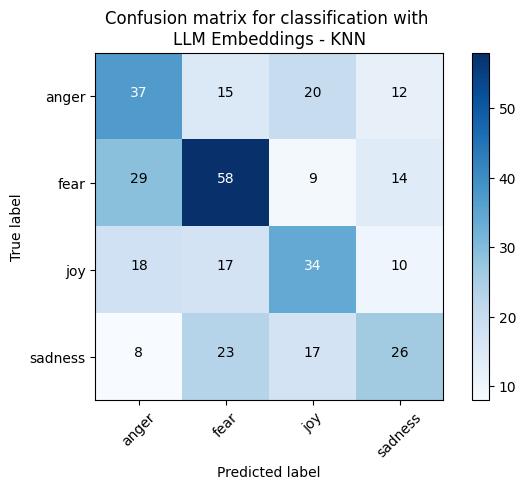

In [93]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [94]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [95]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [96]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 3072)

In [97]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [98]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)
y_test_llama = label_encode(label_encoder, y_test)

In [99]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [100]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_1 (Softmax)                  │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3951 - loss: 1.3624 - val_accuracy: 0.5360 - val_loss: 1.1393
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6430 - loss: 0.8612 - val_accuracy: 0.5821 - val_loss: 1.0545
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7494 - loss: 0.6563 - val_accuracy: 0.5821 - val_loss: 1.1166
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7997 - loss: 0.5483 - val_accuracy: 0.5793 - val_loss: 1.0919
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8426 - loss: 0.4354 - val_accuracy: 0.5476 - val_loss: 1.3124
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8634 - loss: 0.3828 - val_accuracy: 0.5476 - val_loss: 1.4720
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8916 - loss: 0.3058 - val_accuracy: 0.5706 - val_loss: 1.4535
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9044 - loss: 0.2643 - val_accuracy: 0.

In [103]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[1.4461462e-07, 3.9811659e-04, 9.9960119e-01, 6.0276210e-07],
       [1.5913004e-01, 3.3765935e-04, 8.3967066e-01, 8.6162233e-04],
       [7.0972733e-12, 9.9999994e-01, 1.2241302e-11, 1.1390524e-09],
       [7.6374596e-01, 2.1471630e-01, 7.6512811e-07, 2.1536963e-02],
       [3.5681329e-05, 9.8085266e-01, 1.6296120e-08, 1.9111527e-02]],
      dtype=float32)

In [104]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'joy', 'fear', 'anger', 'fear'], dtype=object)

In [105]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.55


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.466371,1.216866,0.536023,1.139326
1,1,0.638251,0.881265,0.582133,1.054531
2,2,0.730418,0.695197,0.582133,1.116608
3,3,0.796014,0.551776,0.579251,1.091917
4,4,0.837254,0.441785,0.547550,1.312421
5,5,0.851647,0.399132,0.547550,1.472006
6,6,0.885414,0.321228,0.570605,1.453460
7,7,0.902574,0.277421,0.564842,1.430320
8,8,0.928868,0.209816,0.561960,1.650850
9,9,0.931913,0.192511,0.556196,1.762369


In [108]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.54      0.45      0.49        84
        fear       0.55      0.72      0.62       110
         joy       0.64      0.57      0.60        79
     sadness       0.47      0.41      0.43        74

    accuracy                           0.55       347
   macro avg       0.55      0.54      0.54       347
weighted avg       0.55      0.55      0.55       347



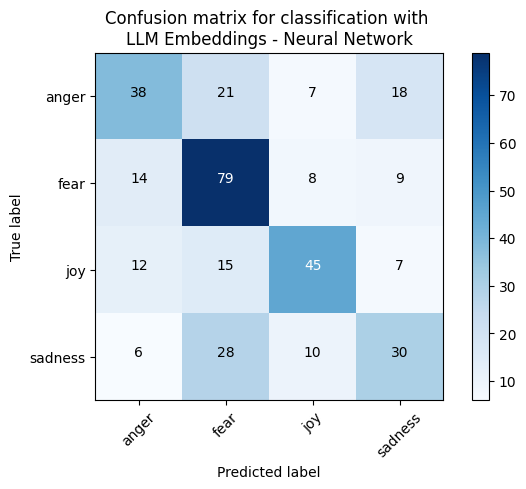

In [109]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

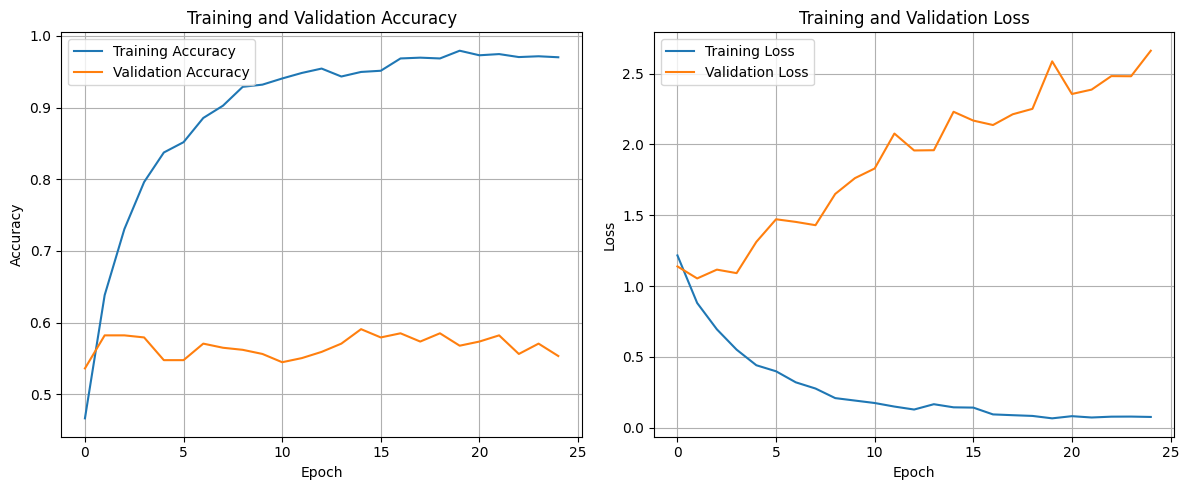

In [114]:
# Answer Here
# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(training_log['epoch'], training_log['loss'], label='Training Loss')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The training accuracy rapidly increase, but stagnates at near 100%, however the validation accuracy remains notably low, hovering around 60%.

The training loss decreases sharply to near zero, which suits the high training accuracy. The validation loss initialy decreses, but then gradually increases.

**Compare the results of both KNN and the NN we just implemented.**

KNN Accuracy: 0.447,
NN Accuracy: 0.55

The NN model shows better peformance by around 10%. This may be because KNN is a simple algorithm that makes prediction based on the nearest training examples in the feature space. For high dimensional spaces, theres a sufficient amount of data to cover. This can be disadvantageous for high dimensional spaces (LLM) due to curse of dimensionality.

NN has a more complex structure that is capable of caputuring deeper patterns in the data, making it better suited for high dimensional data typical of text embeddings.

**Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.**

LLM embeddings are high dimensional and dense, which captures nuanced semantic relationships, simpler models might struggle with it. KNN struggles with high dimensional data due to curse of dimensionality, NN handles complex high dimensional data better because it can learn non linear relationships better. It can also adapt in adjusting the weights to minimize classification errors.

### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [112]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2"

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

In [121]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Invalid response: i can’t classify that text. is there anything else i can help you with?. Asking for reclassification.
Invalid response: i can't classify the given text as it contains only random characters and doesn't appear to be written in any language.. Asking for reclassification.
Invalid response: i can't classify the text as it contains unclear and potentially ambiguous characters. is there anything else i can help you with?. Asking for reclassification.
Invalid response: i can't classify the text you provided as it appears to be nonsensical and potentially toxic or abusive language. is there anything else i can help you with?. As

KeyboardInterrupt: 


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: I'm just doing what u should b doing just minding my business and grinding relentless @LITO615
Emotion: anger

Text: Forgot to plug the phone in overnight #nightmare
Emotion: fear

Text: Dear everyone at HSSU, stop walking with your phones up so I can smile and wave at you and you can smile and wave back :(
Emotion: joy

Text: @Cpt_SRogers_\n'Well it can go one of two ways. You either get over it and accept it, because it's not going to change, or you mope about --
Emotion: sadness


Accuracy: 40.00%
              precision    recall  f1-score   support

       anger       0.35      0.65      0.46        20
        fear   

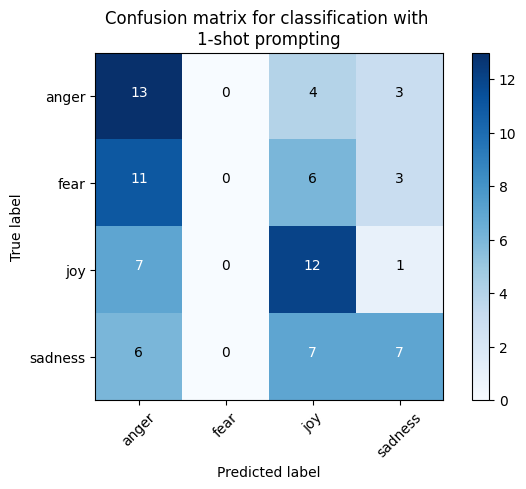

In [120]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: I'm just doing what u should b doing just minding my business and grinding relentless @LITO615
Emotion: anger

Text: streets of rage 2 was hard to find for a while and then Itunes stepped in and the guys doing the vinyl \nmade it so simple
Emotion: anger

Text: @OstinOng YUUUHH 🙄😭 plus clin ep and prevmed ugghhh hahaha #bitter
Emotion: anger

Text: Damn our offense is a mix bag of unpredictable lethal weapons I'm worried for Defense Coordinators 😁 #Chargers #Boltup #Recharged
Emotion: anger

Text: New madden kicking 🚮
Emotion: anger

Text: Forgot to plug the phone in overnight #nightmare
Emotion: fear

Text: @EurekaForbes 

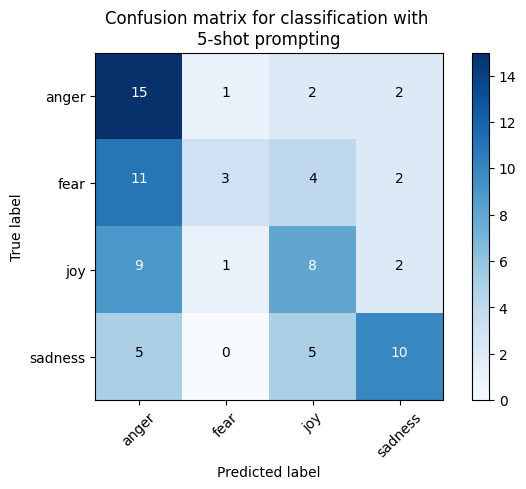

In [124]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

In [ ]:
# Answer here
# Zero-Shot
# After leaving it running for 1 hour+, the system failed to classify any text accurately,
# this approach struggles without any prior examples, as seen from invalid responses.

# 1-Shot
# The system receive an accuracy of 40%, which means it can classify emotions better than zero-shot
# particularly "anger" and "joy". However, there is a low precision and recall for "fear", which indicates
# difficulty in catching subtler or less distinct classes with minimal data, as it is often mistaken as "anger"

# 5-Shot
# The system receive an accuracy of 45%, which means it has an improved performance across most emotions,
# especially "anger" and "sadness", which show that with more examples, we can improve the accuracy rate.
# However, despite more data, "fear" still shows low performance, which means that "fear" might be more challenging
# classify or the provided examples are not sufficient.

# There is an obvious learning curve from zero-shot to 5-shot, it shows a gradual improvements in accuracy and F1-scores.
# So an increasing the number of training examles generally helps the model to better understand and categorize emotions.

# The complete failure of zero-shot classification (at least on my machine) shows that the model is very dependant on having
# prior knowledge or examples to funciton effectively, which is no surprise.

# So for practical applications, zero-shot might not be reliable unless the model has been extremely trained or fine tunes on
# similar type of data. One-shot and few-shot shows more promise but still require careful selection of training examples
# to cover the range of possible inputs adequately.

### 10.6 Extra LLM Materials:
So this will be it for the lab, but here are some extra materials if you would like to explore:
- How to use Gemini's LLM API from Google: [Gemini Collab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb?fbclid=IwZXh0bgNhZW0CMTEAAR0-gg7cDIuaGfkeN5U3rusSNKj2jj7bIsL45sZWaM0NbTE7BSNtfzBeEGE_aem_yT5wAuL_G5E21iuuCYJXwA#scrollTo=hskqSKnJUHvp) (Free with some restrictions to the requests per minute.

- How to use OpenAI ChatGPT model's API (Not Free API): [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

---